In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import seaborn as sns
import re
subset_columns = ['0','1']
colors = pd.read_csv(r'C:\Users\dell\Desktop\Python_project\ZYD366\bra\colors.csv', usecols = subset_columns)  #导入colors.csv文件
bra = pd.read_csv(r'C:\Users\dell\Desktop\Python_project\ZYD366\bra\bra.csv')#导入bra.csv文件
new_name = {'0':'productColor', '1':'color'}
colors.rename(columns = new_name, inplace = True)  #重新命名colors文件的列名
bra_colors = pd.merge(bra, colors, how='outer')  #合并bra 和 colors两个csv文件
bra_color = bra_colors.dropna()   #删除空缺值
bra_color

,creationTime,productColor,productSize,color
0,2016-06-08 17:17:00,22咖啡色,75C,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,棕色
2,2017-08-03 20:39:18,22咖啡色,80B,棕色
3,2016-07-06 14:02:08,22咖啡色,75B,棕色
4,2017-03-18 11:49:55,22咖啡色,80B,棕色
...,...,...,...,...
15492,2017-11-03 16:39:13,粉色套装（含内裤）,34A/75A,粉色
15493,2017-11-07 23:03:10,粉色套装（含内裤）,34B/75B,粉色
15494,2017-11-14 17:25:37,粉色套装（含内裤）,34A/75A,粉色
15495,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C,粉色


In [11]:
pattern_A = re.compile(r'[S-Xs-x]+',re.I)
pattern_B = re.compile(r'[7-9]\d[A-Z]', re.I)
pattern_C = re.compile(r'[A-Z][7-9]\d', re.I)
for i in range(len(bra_color)):
    try:
        size_matchA = pattern_A.findall(bra_color['productSize'][i])
        size_matchB = pattern_B.findall(bra_color['productSize'][i])
        size_matchC = pattern_C.findall(bra_color['productSize'][i])
        if size_matchA:
            # print(size_matchA)
            bra_color.drop(i, axis = 0, inplace = True)
        elif size_matchB:
            # print(size_matchB)
            bra_color['productSize'][i] = size_matchB[0].upper()
        elif size_matchC:
            # print(size_matchC)
            bra_color['productSize'][i] = size_matchC[0][1:] + size_matchC[0][0].upper()
    except:
        continue
bra_color.index = range(len(bra_color))
bra_color

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,creationTime,productColor,productSize,color
0,2016-06-08 17:17:00,22咖啡色,75C,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,棕色
2,2017-08-03 20:39:18,22咖啡色,80B,棕色
3,2016-07-06 14:02:08,22咖啡色,75B,棕色
4,2017-03-18 11:49:55,22咖啡色,80B,棕色
...,...,...,...,...
15372,2017-11-03 16:39:13,粉色套装（含内裤）,75A,粉色
15373,2017-11-07 23:03:10,粉色套装（含内裤）,75B,粉色
15374,2017-11-14 17:25:37,粉色套装（含内裤）,75A,粉色
15375,2017-11-11 00:13:32,粉色套装（含内裤）,80C,粉色


{'75C': 357, '80B': 3968, '75B': 6954, '70C': 27, '80C': 581, '85B': 988, '70B': 449, '85C': 249, '75A': 483, '70A': 171, '80A': 270, '85A': 100, '165/76/L': 152, '160/70/M': 113, '90C': 35, '90B': 20, '85D': 17, '85E': 17, '80D': 18, '75E': 5, '90D': 21, '95C': 4, '80E': 8, '95D': 4, '75D': 360, '90E': 3, '95E': 1, '85/38C': 2}
{'棕色': 51, '粉色': 1993, '蓝色': 3394, '黑色': 2119, '肤色': 2147, '红色': 2686, '紫色': 2505, '黄色': 268, '灰色': 117, '绿色': 97}


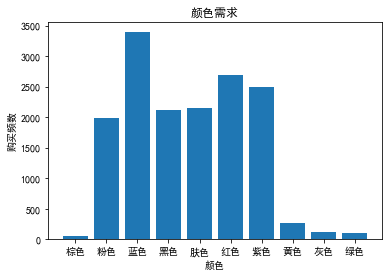

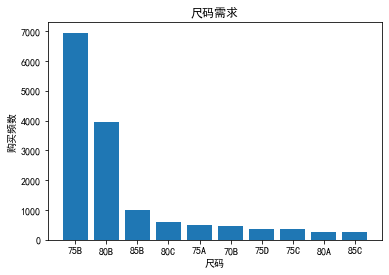

In [14]:
d={}
for x in bra_color['productSize']: #尺码替换
    if not x in d:                 #构造字典并查看各值重复的次数
        d[x]=1
    else:
        d[x]=d[x]+1
print(d)
c={}
for x in bra_color['color']:       #构造字典并查看各值重复的次数
    if not x in c:
        c[x]=1    
    else:
        c[x]=c[x]+1
print(c)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False      #添加图形字体
x1 = list(d.keys())
y1 = list(d.values())
x2 = list(c.keys())
y2 = list(c.values())
y1_reflect=[]
y1_sort=sorted(y1,key=int,reverse=True)
for e in y1_sort:
    if e in y1:
        y1_reflect.append(x1[y1.index(e)])     #将列表x1、y1的值一一对应
y3 = y1_sort[:10]
x3 = y1_reflect[:10]     #取前十个出现次数多的尺码
plt.bar(x2,y2)                 #构造颜色需求的条形图
plt.xlabel('颜色')           
plt.ylabel('购买频数')
plt.title('颜色需求')
plt.show()
plt.bar(x3,y3)              #构造尺码需求的条形图
plt.xlabel('尺码')         
plt.ylabel('购买频数')
plt.title('尺码需求')
plt.show()